In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2022-04-25 / Aki Taanila


# Tunnuslukujen vertailua ryhmien välillä

Määrälliselle muuttujalle laskettuja tilastollisia tunnuslukuja voin vertailla kategorisen muuttujan määräämissä ryhmissä.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# t-testi ja F-testi merkitsevyyden testaamiseen
from scipy.stats import ttest_ind, f_oneway

plt.style.use('seaborn-whitegrid')

In [3]:
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [4]:
# Sukupuolen ja koulutuksen tekstimuotoiset arvot
sukup = ['Mies', 'Nainen']
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']

## groupby + describe

Voit jakaa datan ryhmiin **groupby**-funktiolla ja laskea tilastolliset tunnusluvut **describe**-funktiolla

In [5]:
# Palkan tunnuslukujen vertailu sukupuolen mukaan
df1 = df.groupby('sukup')['palkka'].describe()

# Taulukon otsikot
df1.index = sukup

# Tunnusluvuille suomenkieliset nimet
df1.columns = ['Lukumäärä', 'Keskiarvo', 'Keskihajonta', 'Pienin', 'Alaneljännes', 
               'Mediaani', 'Yläneljännes', 'Suurin']

# Ulkoasun tuunaus
df1.style.format('{:.0f}')

,Lukumäärä,Keskiarvo,Keskihajonta,Pienin,Alaneljännes,Mediaani,Yläneljännes,Suurin
Mies,63,2664,930,1521,2086,2417,2925,6278
Nainen,19,2233,341,1715,1969,2144,2574,2729


In [6]:
# Palkan tunnuslukujen vertailu koulutuksen mukaan
df2 = df.groupby('koulutus')['palkka'].describe()

# Taulukon otsikot
df2.index = koulutus

# Ulkoasun tuunaus
df2.style.format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
Peruskoulu,27,2310,473,1638,2008,2144,2534,3587
2. aste,30,2403,534,1521,2008,2378,2729,3510
Korkeakoulu,22,2887,1108,1559,2222,2710,2925,6278
Ylempi korkeakoulu,2,5147,110,5069,5108,5147,5186,5225


## Ruutu- ja janakaavio eli boxplot

Ruutu- ja janakaavio on havainnollinen tapa vertailuun. Kaavio näyttää viiden luvun yhteenvedon (pienin, alaneljännes, mediaani, yläneljännes, suurin) ja erityisen poikkeavat arvot.

Text(0, 0.5, 'Kuukausipalkka')

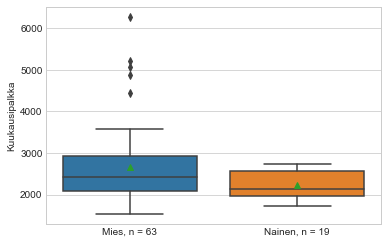

In [7]:
# Palkan vertailu sukupuolen mukaan ruutu- ja janakaaviona
sns.boxplot(x='sukup', y='palkka', data=df, showmeans=True)

# Naisten ja miesten palkka-arvojen lukumäärät
n_mies = int(df1.iloc[0, 0])
n_nainen = int(df1.iloc[1, 0])

# Kategoria-akselin luokkien uudelleen nimeäminen
plt.xticks(ticks=[0, 1], labels=[f'Mies, n = {n_mies}', f'Nainen, n = {n_nainen}'])

plt.xlabel('')
plt.ylabel('Kuukausipalkka')

Text(0, 0.5, 'Kuukausipalkka')

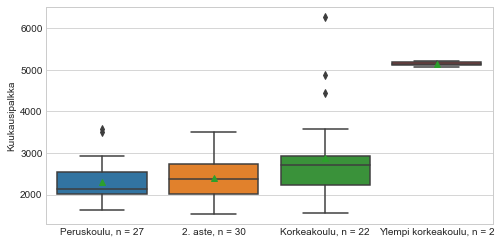

In [8]:
# Palkan vertailu koulutuksen mukaan ruutu- ja janakaaviona

# Pitkiä luokkien nimiöitä varten kasvatan kuvion kokoa
plt.figure(figsize=(8, 4))

sns.boxplot(x='koulutus', y='palkka', data=df, showmeans=True)

# Pientä kikkailua n-arvojen saamiseksi kaavioon
n_koulutus = []
for i in range(4):
    n_koulutus.append(f'{koulutus[i]}, n = {int(df2.iloc[i, 0])}')
plt.xticks(ticks=[0, 1, 2, 3], labels=n_koulutus)

plt.xlabel('')
plt.ylabel('Kuukausipalkka')

## pivot_table()

Pivot-taulukkoon lasketaan oletuksena keskiarvoja.

In [9]:
# Palkkakeskiarvojen vertailua sukupuolen ja koulutuksen mukaan 
df3 = df.pivot_table(values='palkka', index='koulutus', columns='sukup', margins=True)

# Tekstimuotoisten arvojen listoihin täytyy lisätä otsikko viimeistä riviä/saraketta varten (Kaikki)
df3.index = koulutus + ['Kaikki']
df3.columns = sukup + ['Kaikki']

# Ulkoasun tuunaus
df3.style.format('{:.0f}', na_rep='-')

,Mies,Nainen,Kaikki
Peruskoulu,2354,2121,2310
2. aste,2461,2211,2403
Korkeakoulu,3145,2334,2887
Ylempi korkeakoulu,5147,-,5147
Kaikki,2675,2233,2571


## Ovatko keskiarvojen erot tilastollisesti merkitseviä?

Otoksessa havaitut ryhmien väliset erot voivat olla liian pieniä, jotta niitä voisi yleistää laajempaan perusjoukkoon, josta otos on otettu. Kyseessä voi olla otantavirheen (sattuman) aiheuttama ero.

Eroa sanotaan merkitseväksi, jos sen perusteella voidaan tehdä yleistys laajempaan perusjoukkoon, josta otos on otettu. Eron merkitsevyyttä voidaan testata laskemalla niin kutsuttu **p-arvo**. Mitä pienempi p-arvo, sitä merkitsevämpi ero. Yleensä alle 0,05 (5 %) suuruisia p-arvoja pidetään osoituksena merkitsevästä erosta.

Kahden ryhmän keskiarvojen vertailuun liittyvän p-arvon voit laskea kahden riippumattoman otoksen t-testillä (**ttest_ind**).

Vertailtavien ryhmien varianssien yhtäsuuruutta ei yleensä kannata olettaa (**equal_var = False**).

Puuttuvia arvoja sisältävät rivit eivät saa olla testin laskennasta mukana ja **nan_policy**-parametri huolehtii tästä.

In [10]:
# Vertailtavien ryhmien muodostaminen
s1 = df['palkka'][df['sukup']==1] # miehet
s2 = df['palkka'][df['sukup']==2] # naiset

# Kahden riippumattoman (ind) otoksen t-testi
ttest_ind(s1, s2, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=3.0597612743474714, pvalue=0.003048272029697872)

Miesten (keskiarvo 2664 euroa) ja naisten (keskiarvo 2233 euroa) palkkakeskiarvojen välillä on tilastollisesti merkitsevä ero (kahden riippumattoman otoksen 2-suuntaisen t-testin p = 0,003).

Useamman ryhmän keskiarvojen vertailuun liittyvän p-arvon voit laskea F-testillä (**f_oneway**). 

Jos tarkasteltavalla muuttujalla on puuttuvia arvoja, niin alkuperäisen datan sijasta pitää käyttää dataa, josta puuttuvia arvoja sisältävät rivit on poistettu.

In [11]:
# Data, josta on poistettu mahdolliset palkan puuttuvia arvoja sisältävät rivit
df_dropna = df.dropna(subset=['palkka'])

# Vertailtavien ryhmien muodostaminen
k1 = df_dropna['palkka'][df_dropna['koulutus']==1] # peruskoulu
k2 = df_dropna['palkka'][df_dropna['koulutus']==2] # 2. aste
k3 = df_dropna['palkka'][df_dropna['koulutus']==3] # korkeakoulu
k4 = df_dropna['palkka'][df_dropna['koulutus']==4] # ylempi korkeakoulu

# F-testi
f_oneway(k1, k2, k3, k4)

F_onewayResult(statistic=11.675086950951924, pvalue=2.186573534680074e-06)

Eri koulutuksen suorittaneiden välillä on tilastollisesti merkitseviä eroja palkkakeskiarvoissa (F-testin p = 0,000002).

## Lisätietoa

* Onko ryhmien välinen ero tilastolliseti merkitsevä:
https://tilastoapu.wordpress.com/2012/04/14/onko-ryhmien-valinen-ero-tilastollisesti-merkitseva/

* Lisätietoa p-arvoista:
https://tilastoapu.wordpress.com/2012/02/14/p-arvo/

* p-arvoja Pythonilla eri testaustilanteisiin:
https://nbviewer.jupyter.org/github/taanila/selittava/blob/main/p.ipynb

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/